In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
h_d = pd.read_csv(r'C:\Users\OS\Desktop\Workspace\hapt\Housing1.csv')

In [3]:
sorted_data = h_d.sort_values(by='price', ascending=False)
sorted_data.head(5)

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
1  12250000  8960         4          4        4      yes        no       no   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
2              no              no        2      yes   semi-furnished  
1              no             yes        3       no        furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished

In [4]:
h_d.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [5]:
h_d.duplicated().sum()

0

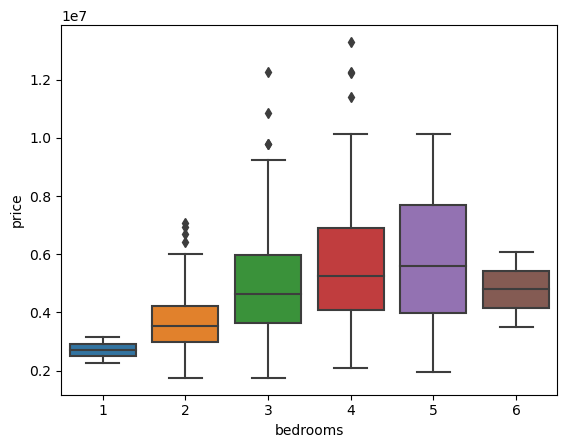

In [6]:
sns.boxplot(x=h_d['bedrooms'],y=h_d['price'])
plt.show()

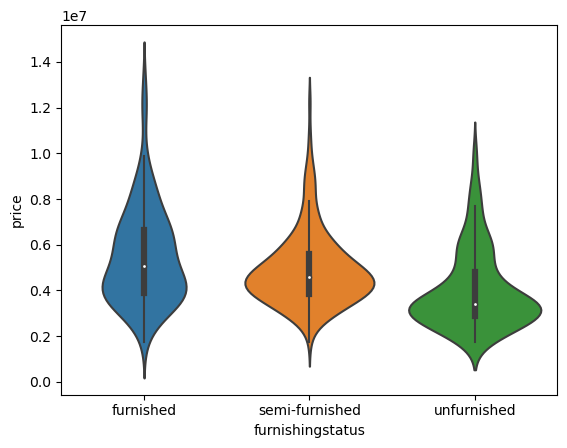

In [7]:
sns.violinplot(x=h_d['furnishingstatus'],y=h_d['price'])
plt.show()

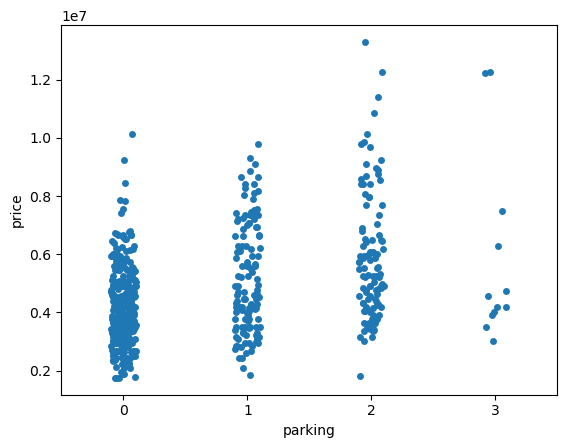

In [8]:
sns.stripplot(x=h_d['parking'],y=h_d['price'])
plt.show()

In [9]:
corr = h_d.corr()
corr

C:\Users\OS\AppData\Local\Temp\ipykernel_12376\3547129380.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = h_d.corr()


price      area  bedrooms  bathrooms   stories   parking
price      1.000000  0.535997  0.366494   0.517545  0.420712  0.384394
area       0.535997  1.000000  0.151858   0.193820  0.083996  0.352980
bedrooms   0.366494  0.151858  1.000000   0.373930  0.408564  0.139270
bathrooms  0.517545  0.193820  0.373930   1.000000  0.326165  0.177496
stories    0.420712  0.083996  0.408564   0.326165  1.000000  0.045547
parking    0.384394  0.352980  0.139270   0.177496  0.045547  1.000000

In [10]:
h_d.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
lb = LabelEncoder()

In [13]:
cat_data = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']
for i in cat_data:
    h_d[i] = lb.fit_transform(h_d[i])

In [14]:
h_d.head()

price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus  
0                 0  
1                 0  
2                 1  
3                 0  
4                 0

In [15]:
def eval(model):
    print("The training score is,",model.score(x_train,y_train),end='\n')
    print("The testing score is,",model.score(x_test,y_test))

In [16]:
def metric_score(ypred,y_test):
    print("The mean absolute error is: ",mean_absolute_error(ypred,y_test))
    print("The mean squared error is: ",mean_squared_error(ypred,y_test))
    print("The R2 score is: ",r2_score(ypred,y_test))

In [17]:
x=h_d.drop('price',axis=1)
y=h_d.price

In [18]:
print(x.head())
print(y.head())
print(type(x))
print(type(y))

   area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0  7420         4          2        3         1          0         0   
1  8960         4          4        4         1          0         0   
2  9960         3          2        2         1          0         1   
3  7500         4          2        2         1          0         1   
4  7420         4          1        2         1          1         1   

   hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  
0                0                1        2         1                 0  
1                0                1        3         0                 0  
2                0                0        2         1                 1  
3                0                1        3         1                 0  
4                0                1        2         0                 0  
0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64
<class 'pandas.core.f

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,confusion_matrix,r2_score

In [20]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 5)

In [21]:
print(x_train.shape,"",type(x_train))
print(y_train.shape,"\t ",type(y_train))
print(x_test.shape,"",type(x_test))
print(y_test.shape,"\t ",type(y_test))

(381, 12)  <class 'pandas.core.frame.DataFrame'>
(381,) 	  <class 'pandas.core.series.Series'>
(164, 12)  <class 'pandas.core.frame.DataFrame'>
(164,) 	  <class 'pandas.core.series.Series'>


In [22]:
from sklearn.tree import DecisionTreeRegressor

In [23]:
DTRmodel = DecisionTreeRegressor(criterion='squared_error',splitter='best',max_depth = 10, min_samples_split=20,random_state=42)
DTRmodel.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=10, min_samples_split=20, random_state=42)

In [24]:
eval(DTRmodel)

The training score is, 0.7359034045875587
The testing score is, 0.4137533567860191


In [25]:
ypred = DTRmodel.predict(x_test)

In [26]:
metric_score(ypred,y_test)

The mean absolute error is:  907505.2489050085
The mean squared error is:  1471210626716.3113
The R2 score is:  0.35889060137566764


In [27]:
from sklearn.ensemble import RandomForestRegressor

In [28]:
RFRmodel = RandomForestRegressor(n_estimators=100,max_depth = 10, min_samples_split=10,random_state=42,criterion='squared_error')
RFRmodel.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, min_samples_split=10, random_state=42)

In [29]:
eval(RFRmodel)

The training score is, 0.8294445816326053
The testing score is, 0.6541797646271963


In [30]:
ypred2 = RFRmodel.predict(x_test)

In [31]:
metric_score(ypred2,y_test)

The mean absolute error is:  719418.2400521481
The mean squared error is:  867850436506.9796
The R2 score is:  0.5034936387237565


In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
LRmodel = LinearRegression()
LRmodel.fit(x_train,y_train)

LinearRegression()

In [34]:
eval(LRmodel)

The training score is, 0.6722721620878298
The testing score is, 0.670112729781189


In [35]:
ypred3 = LRmodel.predict(x_test)

In [36]:
metric_score(ypred3,y_test)

The mean absolute error is:  721569.6538611309
The mean squared error is:  827865989822.3121
The R2 score is:  0.5614064514555359


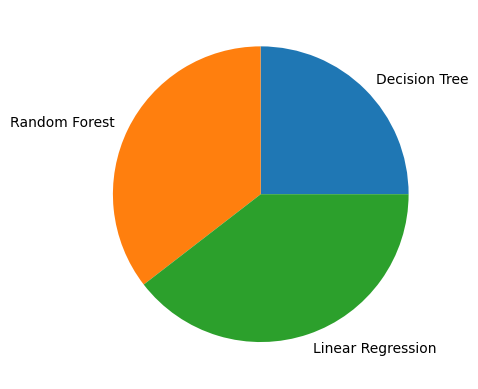

In [37]:
import matplotlib.pyplot as plt

models = ['Decision Tree','Random Forest','Linear Regression']
scores = [35.5,50.3,56.1]

plt.pie(scores,labels=models)
plt.show()